In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/isack/Desktop/HDL/DL Hackathon files/train/train',
                                                 target_size=(128,128),
                                                 batch_size =128,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Users/isack/Desktop/HDL/DL Hackathon files/test',
                                            target_size=(128,128),
                                            batch_size =128,
                                            class_mode = 'binary')

Found 1709 images belonging to 2 classes.
Found 332 images belonging to 1 classes.


Text(0.5, 0, 'Class')

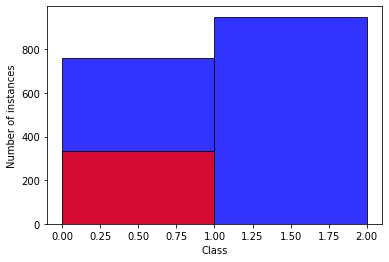

In [6]:
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='blue', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('Number of instances')
plt.xlabel('Class')

In [7]:
X_train=training_set['X_train'][:]
y_train=training_set['y_train'][:]

X_test=test_set['X_test'][:]
y_test=test_set['y_test'][:]

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
x_train=X_train/255.
x_test=X_test/255.

In [ ]:
for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Label: ')
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation="relu",
                units=256))

model.add(Dense(activation='softmax',
                units=10))

model.add(Dense(activation="sigmoid",
                units=1))

model.summary()

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Training

In [ ]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
                  ]

In [ ]:
steps_per_epoch = 1709 // 128
validation_steps =  332 // 128

# steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
# validation_steps = TotalvalidationSamples / ValidationBatchSize

In [ ]:
history = model.fit(
        training_set,
        steps_per_epoch=steps_per_epoch,
        epochs=2,
        validation_data=test_set,
        validation_steps=validation_steps,
        callbacks = callbacks_list
    )

In [ ]:
training_set.class_indices

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)

nepochs=len(history.history['loss'])

plt.plot(range(nepochs), history.history['loss'], 'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.subplot(1,2,2)

plt.plot(range(nepochs), history.history['accuracy'], 'r-', label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')